In [2]:
from dotenv import load_dotenv
import os
from openai import OpenAI
from pathlib import Path

load_dotenv()

openai_api_key = os.getenv('OPENAI_API_KEY')

openai_client = OpenAI(api_key=openai_api_key)

In [3]:
# Create necessary directories
input_image_path = Path("input_images")
data_path = Path("mixed_wiki")

for path in [input_image_path, data_path]:
    if not path.exists():
        Path.mkdir(path)

print("Environment prepared successfully!")

Environment prepared successfully!


In [4]:
!wget "https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj" -O ./input_images/long_range_spec.png
!wget "https://docs.google.com/uc?export=download&id=19pLwx0nVqsop7lo0ubUSYTzQfMtKJJtJ" -O ./input_images/model_y.png
!wget "https://docs.google.com/uc?export=download&id=1utu3iD9XEgR5Sb7PrbtMf1qw8T1WdNmF" -O ./input_images/performance_spec.png
!wget "https://docs.google.com/uc?export=download&id=1dpUakWMqaXR4Jjn1kHuZfB0pAXvjn2-i" -O ./input_images/price.png
!wget "https://docs.google.com/uc?export=download&id=1qNeT201QAesnAP5va1ty0Ky5Q_jKkguV" -O ./input_images/real_wheel_spec.png

--2024-07-18 09:57:23--  https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj
Resolving docs.google.com (docs.google.com)... 

64.233.180.102, 64.233.180.139, 64.233.180.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.180.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download [following]
--2024-07-18 09:57:24--  https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160684 (157K) [image/png]
Saving to: ‘./input_images/long_range_spec.png’

./input_images/long 100%[===================>] 156.92K   815KB/s    in 0.2s    

2024-07-18 09:57:26 (815 KB/s) - ‘./input_images/long_range_spec.png’ saved [160684/160684]

--2024-07-18 09:57:26--  https://docs.goo

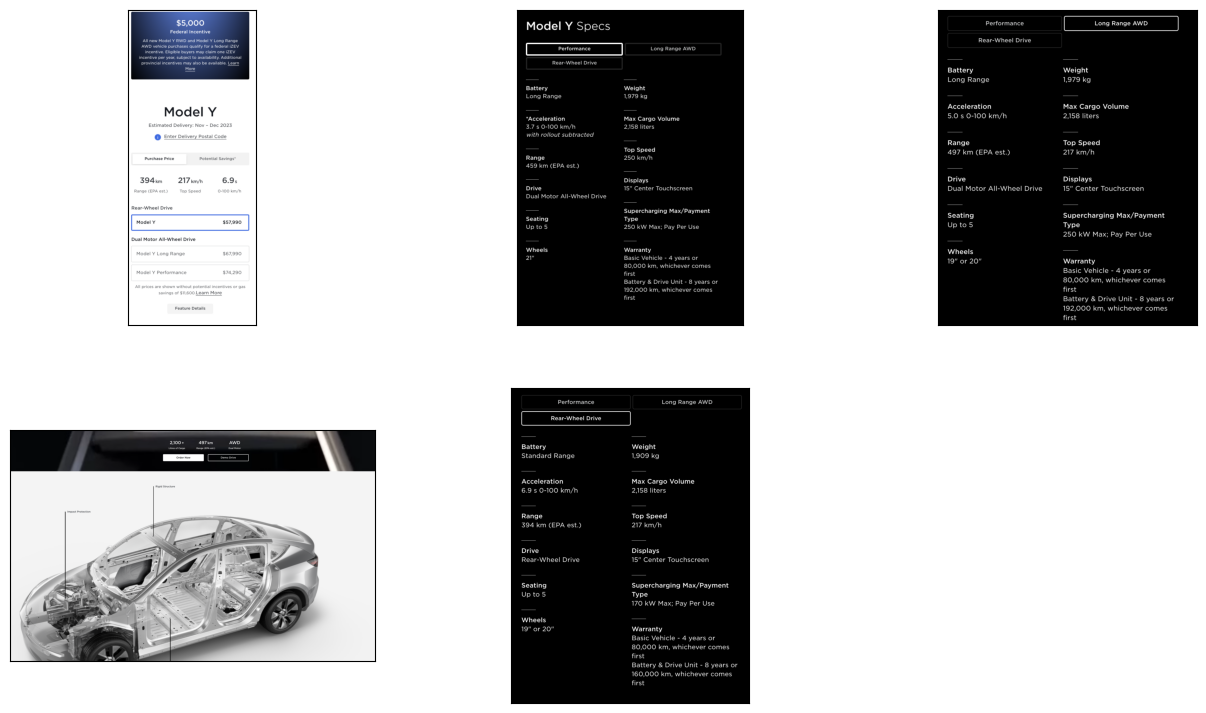

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [6]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=openai_api_key, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt="Generate detailed text description for each image.",
    image_documents=image_documents,
)

print(response_1)

### Image 1: Specifications for Long Range AWD Model

- **Battery**: Long Range
- **Weight**: 1,979 kg
- **Acceleration**: 5.0 s 0-100 km/h
- **Max Cargo Volume**: 2,158 liters
- **Range**: 497 km (EPA est.)
- **Top Speed**: 217 km/h
- **Drive**: Dual Motor All-Wheel Drive
- **Displays**: 15" Center Touchscreen
- **Seating**: Up to 5
- **Supercharging Max/Payment Type**: 250 kW Max; Pay Per Use
- **Wheels**: 19" or 20"
- **Warranty**:
  - Basic Vehicle: 4 years or 80,000 km, whichever comes first
  - Battery & Drive Unit: 8 years or 192,000 km, whichever comes first

### Image 2: Structural Diagram of the Vehicle

- **Visual**: A semi-transparent view of the vehicle's internal structure.
- **Labels**:
  - **Rigid Structure**: Highlighting the vehicle's robust frame.
  - **Impact Protection**: Indicating areas designed for safety in collisions.

### Image 3: Model Y Specifications

- **Model**: Model Y
- **Battery**: Long Range
- **Weight**: 1,979 kg
- **Acceleration**: 3.7 s 0-100 km/h

In [13]:
import requests

headers = {
    "User-Agent": "MultiModalRAG/1.0 (jab@creative.com)"
}

def get_wikipedia_images(title):
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        headers=headers,
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "imageinfo",
            "iiprop": "url|dimensions|mime",
            "generator": "images",
            "gimlimit": "50",
        },
    ).json()
    image_urls = []
    for page in response["query"]["pages"].values():
        if page["imageinfo"][0]["url"].endswith((".jpg", ".png")):
            image_urls.append(page["imageinfo"][0]["url"])
    return image_urls

In [14]:
# List of Wikipedia titles to fetch
wiki_titles = {
    "Tesla Model Y",
    "Tesla Model X",
    "Tesla Model 3",
    "Tesla Model S",
    "Kia EV6",
    "BMW i3",
    "Audi e-tron",
    "Ford Mustang",
    "Porsche Taycan",
    "Rivian",
    "Polestar",
}

In [16]:
# Fetch text and images
import urllib
import time

image_uuid = 0
MAX_IMAGES_PER_WIKI = 20

for title in wiki_titles:
    # Fetch text
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json()
    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    with open(data_path / f"{title}.txt", "w") as fp:
        fp.write(wiki_text)

    # Fetch images
    images_per_wiki = 0
    list_img_urls = get_wikipedia_images(title)

    for url in list_img_urls:
        if url.endswith((".jpg", ".png", ".svg")):
            image_uuid += 1
            urllib.request.urlretrieve(
                    url, data_path / f"{image_uuid}.jpg"
                )
            images_per_wiki += 1
            if images_per_wiki >= MAX_IMAGES_PER_WIKI:
                break

        time.sleep(1)

print("Data collection completed!")

Data collection completed!


In [17]:
!wget "https://www.dropbox.com/scl/fi/mlaymdy1ni1ovyeykhhuk/tesla_2021_10k.htm?rlkey=qf9k4zn0ejrbm716j0gg7r802&dl=1" -O ./mixed_wiki/tesla_2021_10k.htm

--2024-07-18 10:40:54--  https://www.dropbox.com/scl/fi/mlaymdy1ni1ovyeykhhuk/tesla_2021_10k.htm?rlkey=qf9k4zn0ejrbm716j0gg7r802&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3389e8b20559094f28fd1831ac.dl.dropboxusercontent.com/cd/0/inline/CW_QPP6Xs2-4UwE8XSD_NmV1QWabS-4ZLsFMN568UxPi7vqyLNWpVsvhNCBU6CK7E9tWWkMY8ofLXcJHt6YyGbV6GRDb4AgmW60VWPz8wIQIWc7euJ8rNatqu1SajnrHQs4/file?dl=1# [following]
--2024-07-18 10:40:55--  https://uc3389e8b20559094f28fd1831ac.dl.dropboxusercontent.com/cd/0/inline/CW_QPP6Xs2-4UwE8XSD_NmV1QWabS-4ZLsFMN568UxPi7vqyLNWpVsvhNCBU6CK7E9tWWkMY8ofLXcJHt6YyGbV6GRDb4AgmW60VWPz8wIQIWc7euJ8rNatqu1SajnrHQs4/file?dl=1
Resolving uc3389e8b20559094f28fd1831ac.dl.dropboxusercontent.com (uc3389e8b20559094f28fd1831ac.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f


In [21]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext
import qdrant_client

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(client=client, collection_name="text_collection")
image_store = QdrantVectorStore(client=client, collection_name="image_collection")

storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

print("Multimodal index built successfully!")

Multimodal index built successfully!


In [22]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

MAX_TOKENS = 50
retriever_engine = index.as_retriever(
    similarity_top_k=3, image_similarity_top_k=3
)

def retrieve_and_display(query):
    retrieval_results = retriever_engine.retrieve(query[:MAX_TOKENS])

    retrieved_images = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_images.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)

    if retrieved_images:
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(retrieved_images):
            plt.subplot(1, len(retrieved_images), i+1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
# retrieve_and_display("Tell me about electric cars")

**Node ID:** 51ee6c1e-13f5-4033-82e7-ae58c470b9d2<br>**Similarity:** 0.8389554043511408<br>**Text:** The Tesla Model S is a battery electric executive car with a liftback body style built by Tesla, Inc. since 2012. The Model S features a battery-powered dual-motor, all-wheel drive layout, although...<br>

**Node ID:** 342f9ed2-8978-4dd5-a21e-5af3519c4d94<br>**Similarity:** 0.8302796075348732<br>**Text:** The Tesla Model X is a battery electric mid-size luxury crossover SUV built by Tesla, Inc. since 2015. Developed from the full-sized sedan platform of the Tesla Model S, the vehicle notably uses fa...<br>

**Node ID:** 28f0f082-d9f1-4474-91f6-72f490d5ac81<br>**Similarity:** 0.8258952824268733<br>**Text:** === Power discrepancy ===
The P85D "insane mode" was widely reported to have 691 horsepower, but some owners reported 20% less power on the dynamometer in various circumstances. As of November 2015...<br>

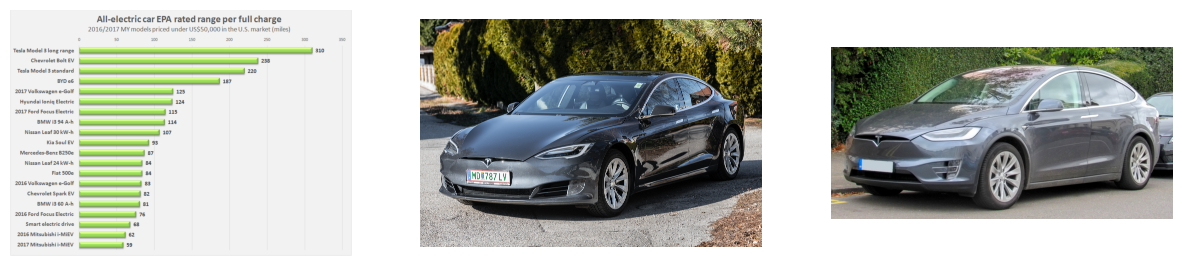

In [23]:
retrieve_and_display("What is the best electric Sedan?")

Answer: The design features of the Tesla Model S and Rivian R1 vehicles can be compared based on the provided context information:

### Tesla Model S:
1. **Powertrain:**
   - **Raven Powertrain:** Includes a permanent magnet synchronous reluctance motor from the Tesla Model 3 as the front motor, which is more powerful and efficient.
   - **Palladium (Plaid) Powertrain:** Features a new powertrain with one motor for the front axle and two motors for the rear axle. The Plaid model includes innovative motors with a carbon-wrapped rotor for higher RPM.

2. **Performance:**
   - **Plaid Model:** 1,020 hp (760 kW) and 1,050 lb⋅ft (1,420 N⋅m) of torque. 0–60 mph in 2.07 seconds and a top speed of 200 mph (320 km/h).

3. **Suspension and Thermal Management:**
   - **Raven:** New adaptive air suspension.
   - **Palladium:** New suspension and thermal management systems.

4. **Interior:**
   - New interior design with a non-circular yoke steering wheel, landscape-oriented center screen, rear pas

**Node ID:** fcb13015-40ea-46c1-a4f0-9173fdaff5ba<br>**Similarity:** 0.858430128980928<br>**Text:** === R1T ===

The R1T is a pickup truck, which features four electric motors, two located on each axle (front and rear). The front two motors produce 415 hp (309 kW) and 413 lb⋅ft (560 N⋅m) of torqu...<br>

**Node ID:** 6a51bf09-928f-426d-8f14-467e348a98c4<br>**Similarity:** 0.8448961204767352<br>**Text:** === Raven ===
In 2019, the Performance and Long Range Plus variants offered the "Raven" powertrain. It included the permanent magnet synchronous reluctance motor from the Tesla Model 3 as the front...<br>

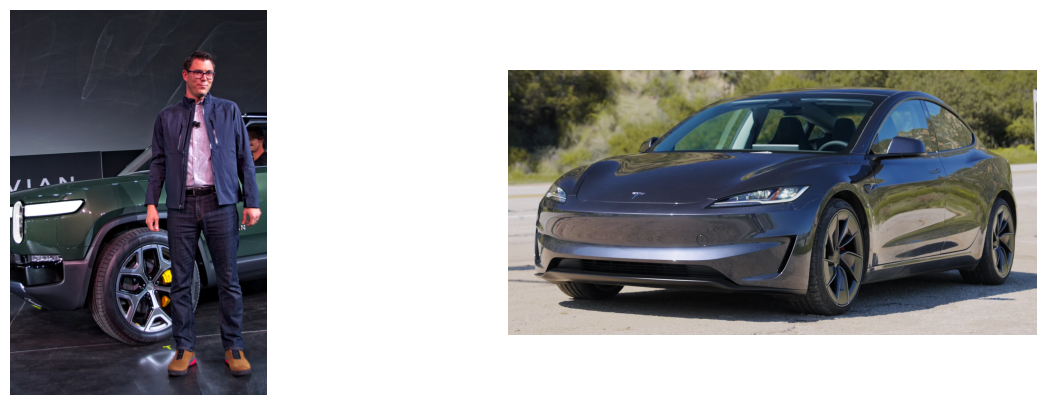

In [24]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)

def multimodal_rag_query(query_str):
    response = query_engine.query(query_str)
    print("Answer:", str(response))

    print("\nSources:")
    for text_node in response.metadata["text_nodes"]:
        display_source_node(text_node, source_length=200)

    if response.metadata["image_nodes"]:
        plt.figure(figsize=(15, 5))
        for i, img_node in enumerate(response.metadata["image_nodes"]):
            plt.subplot(1, len(response.metadata["image_nodes"]), i+1)
            img = Image.open(img_node.metadata["file_path"])
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
multimodal_rag_query("Compare the design features of Tesla Model S and Rivian R1")